## 讀取MNIST數據

In [12]:
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

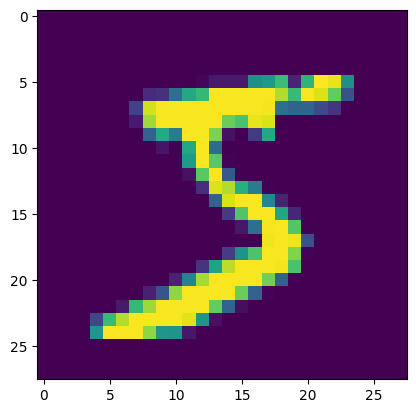

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [15]:
y_train[0]

5

## 資料預處理

In [16]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [17]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
from tensorflow.keras import utils
y_train_ = utils.to_categorical(y_train, 10)
y_test_ = utils.to_categorical(y_test, 10)

## 建立類神經網路(ANN)模型

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# Dense: x * w + b
model.add(Dense(256, activation = 'relu', input_shape = (784,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='sgd',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

## 模型訓練

In [23]:
model.fit(x_train, y_train_, 
    epochs=15, batch_size = 256,
    validation_data = (x_test, y_test_))

Epoch 1/15
235/235 [==============================] - 4s 14ms/step - loss: 1.5840 - accuracy: 0.6375 - val_loss: 0.9382 - val_accuracy: 0.8158
Epoch 2/15
235/235 [==============================] - 6s 26ms/step - loss: 0.7220 - accuracy: 0.8407 - val_loss: 0.5474 - val_accuracy: 0.8686
Epoch 3/15
235/235 [==============================] - 5s 22ms/step - loss: 0.5064 - accuracy: 0.8723 - val_loss: 0.4358 - val_accuracy: 0.8859
Epoch 4/15
235/235 [==============================] - 6s 27ms/step - loss: 0.4268 - accuracy: 0.8866 - val_loss: 0.3803 - val_accuracy: 0.8980
Epoch 5/15
235/235 [==============================] - 3s 15ms/step - loss: 0.3844 - accuracy: 0.8955 - val_loss: 0.3495 - val_accuracy: 0.9034
Epoch 6/15
235/235 [==============================] - 3s 12ms/step - loss: 0.3572 - accuracy: 0.9016 - val_loss: 0.3286 - val_accuracy: 0.9069
Epoch 7/15
235/235 [==============================] - 3s 12ms/step - loss: 0.3374 - accuracy: 0.9060 - val_loss: 0.3123 - val_accuracy: 0.9117

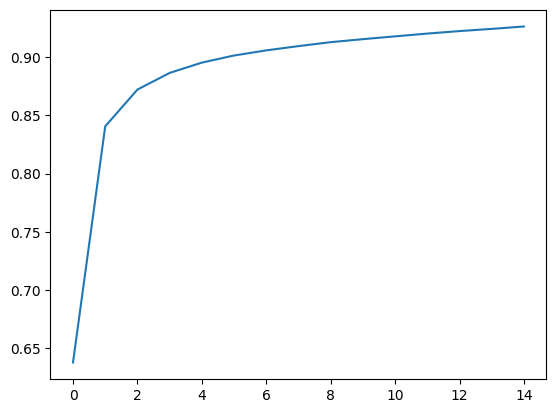

In [24]:
plt.plot(range(len(model.history.history['accuracy'])), model.history.history['accuracy'])

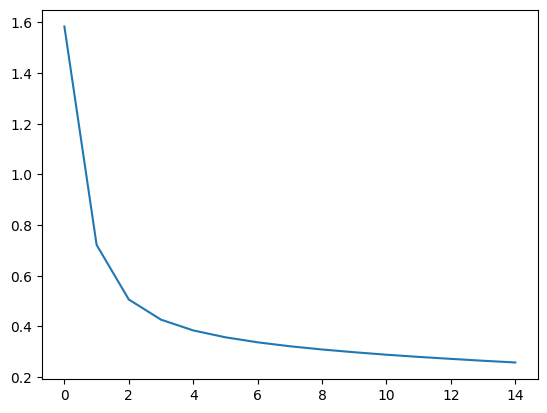

In [25]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])